**Problem 2**

1. (2 points) Implement a binary linear classifier on the first two dimensions (sepal length and width) of the iris dataset and plot its decision boundary. (Hint: sklearn refers to the binary linear classifier as a LogisticRegression, we will see why later in the course.)

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

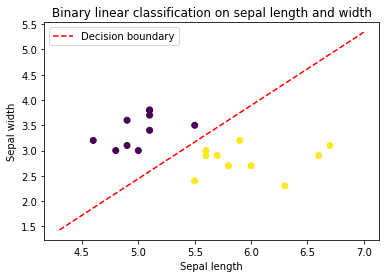

The weight vector is: [ 1.80226162 -1.24492959]
The bias is: -5.968527502942981


In [2]:
# Load the iris data
data, targets = datasets.load_iris(return_X_y=True)
# Get the first two dimensions of the first 100 iris data entires only
iris_data = data[:100, :2]
iris_targets = targets[:100]

# test_size gets 80% per the question
x_train, x_test, t_train, t_test = model_selection.train_test_split(iris_data, iris_targets, test_size=0.8, random_state=0)

# Logistic Regression function call
lg = LogisticRegression()
# Fit the logisitic regression function to the training data
lg_clf = lg.fit(x_train, t_train)

# Plot the data
plt.scatter(x_train[:, 0], x_train[:, 1], c=t_train)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

# Find the weights and bias
weights = lg_clf.coef_[0] 
w1, w2 = weights[0], weights[1]
bias = lg_clf.intercept_[0]

# Find the slope of the decision boundary and y-intercept
m = -w1/w2
y_int = -bias/w2

# Get x min and x max and y min and y max
x_min, x_max = (iris_data[:,0].min(), iris_data[:,0].max())
y_min, y_max = (iris_data[:,1].min(), iris_data[:,1].max())

# Get equation of the line from the x values
x_values = np.array([x_min, x_max])
y_values = m*x_values + y_int

# Plot the boundary and make labels
plt.plot(x_values, y_values, 'k', color='red', linestyle='dashed', label="Decision boundary")
plt.title("Binary linear classification on sepal length and width")
plt.legend()
plt.show()

# Print the weight vector and bias
print("The weight vector is: " + str(weights))
print("The bias is: " + str(bias))

2. (1 point) Report the accuracy of your binary linear classifier on both the training and
test sets.

In [3]:
# Training accuracy
training_accuracy = lg_clf.score(x_train, t_train)
print("The training accuracy score is: " + str(training_accuracy))

# Testing accuracy
testing_accuracy = lg_clf.score(x_test, t_test)
print("The testing accuracy score is: " + str(testing_accuracy))

The training accuracy score is: 1.0
The testing accuracy score is: 0.9875


3. (2 points) Implement a linear SVM classifier on the first two dimensions (sepal length
and width). Plot the decision boundary of the classifier and its margins.

The weight vector is: [ 3.33266363 -3.33342658]
The bias is: -7.662778452658107


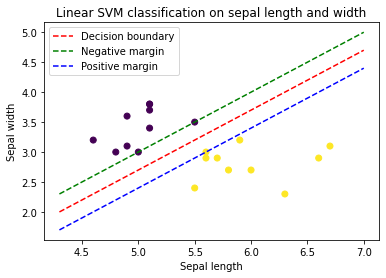

In [4]:
from sklearn import svm

# SVM function call
svm_clf = svm.SVC(kernel='linear', C=1000).fit(x_train, t_train) 

# Find the weights and bias
bias = svm_clf.intercept_[0]
weights = svm_clf.coef_[0] 
w1, w2 = weights[0], weights[1]

# Find the slope of the decision boundary and y-intercept
m = -w1/w2
y_int = -bias/w2

# Get x min and x max and y min and y max
x_min, x_max = (iris_data[:,0].min(), iris_data[:,0].max())
y_min, y_max = (iris_data[:,1].min(), iris_data[:,1].max())

# Get equation of the line from the x values
x_values = np.array([x_min, x_max])
y_values = m*x_values + y_int

# Plot the data
plt.scatter(x_train[:, 0], x_train[:, 1], c=t_train)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.plot(x_values, y_values, 'k', color='red', linestyle='dashed', label="Decision boundary")

# Find the top and bottom margins
decision = np.sqrt(np.sum(weights ** 2))
decision_lower = y_values - 1/w2
decision_upper = y_values + 1/w2

# Plot
plt.plot(x_values, decision_lower, 'k', color='green', linestyle='dashed', label="Negative margin")
plt.plot(x_values, decision_upper, 'k', color='blue', linestyle='dashed', label="Positive margin")
plt.title("Linear SVM classification on sepal length and width")
plt.legend()

# Print the weight vector and bias
print("The weight vector is: " + str(weights))
print("The bias is: " + str(bias))

4. (1 point) Circle the support vectors. Please justify how to identify them through the
duality theorem. (hint: KKT condition)

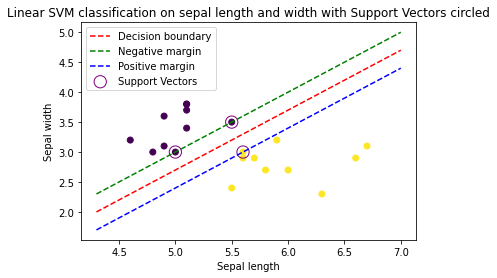

In [5]:
# SVM function call
svm_clf = svm.SVC(kernel='linear', C=1000).fit(x_train, t_train) 

# Find the weights and bias
bias = svm_clf.intercept_[0]
weights = svm_clf.coef_[0] 
w1, w2 = weights[0], weights[1]

# Find the slope of the decision boundary and y-intercept
m = -w1/w2
y_int = -bias/w2

# Get x min and x max and y min and y max
x_min, x_max = (iris_data[:,0].min(), iris_data[:,0].max())
y_min, y_max = (iris_data[:,1].min(), iris_data[:,1].max())

# Get equation of the line from the x values
x_values = np.array([x_min, x_max])
y_values = m*x_values + y_int

# Plot the data
plt.scatter(x_train[:, 0], x_train[:, 1], c=t_train)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.plot(x_values, y_values, 'k', color='red', linestyle='dashed', label="Decision boundary")

# Find the top and bottom margins
decision = np.sqrt(np.sum(weights ** 2))
decision_lower = y_values - 1/w2
decision_upper = y_values + 1/w2

# Plot
plt.plot(x_values, decision_lower, 'k', color='green', linestyle='dashed', label="Negative margin")
plt.plot(x_values, decision_upper, 'k', color='blue', linestyle='dashed', label="Positive margin")
plt.title("Linear SVM classification on sepal length and width with Support Vectors circled")

# Circle the support vectors
plt.scatter(svm_clf.support_vectors_[:,0], svm_clf.support_vectors_[:,1], s=150, facecolors='none', edgecolors='purple', label='Support Vectors')

plt.legend()

5. (1 point) Report the accuracy of your linear SVM classifier on both the training and
test sets.

In [6]:
# Training accuracy
training_accuracy = svm_clf.score(x_train, t_train)
print("The training accuracy score is: " + str(training_accuracy))

# Testing accuracy
testing_accuracy = svm_clf.score(x_test, t_test)
print("The testing accuracy score is: " + str(testing_accuracy))

The training accuracy score is: 1.0
The testing accuracy score is: 1.0


6. (1 point) What is the value of the margin? Justify your answer.

The value of the margin, C, is 2 divided by the norm of the weights squared.



In [7]:
weights = svm_clf.coef_[0] 
print("The value of the margin is: " + str(2/np.linalg.norm(weights)))

The value of the margin is: 0.42430075463962574


8. (3 points) Split the iris dataset again in a training and test set, this time setting test size
to 0.4 when calling train test split. Train the SVM classifier again. Does the decision
boundary change? How about the test accuracy? Please justify why (hint: think about
the support vectors), and illustrate your argument with a new plot.

The weight vector is: [ 6.31804679 -5.26503723]
The bias is: -17.32197688065553
The training accuracy score is: 1.0
The testing accuracy score is: 1.0


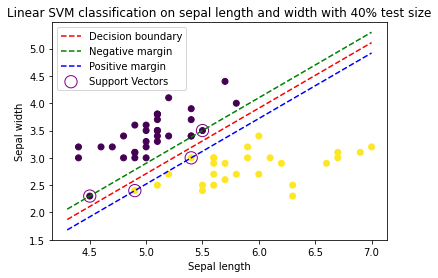

In [8]:
# test_size gets 40% per the question
x_train, x_test, t_train, t_test = model_selection.train_test_split(iris_data, iris_targets, test_size=0.4, random_state=0)

# SVM function call
svm_clf = svm.SVC(kernel='linear', C=1000).fit(x_train, t_train) 

# Find the weights and bias
bias = svm_clf.intercept_[0]
weights = svm_clf.coef_[0] 
w1, w2 = weights[0], weights[1]

# Find the slope of the decision boundary and y-intercept
m = -w1/w2
y_int = -bias/w2

# Get x min and x max and y min and y max
x_min, x_max = (iris_data[:,0].min(), iris_data[:,0].max())
y_min, y_max = (iris_data[:,1].min(), iris_data[:,1].max())

# Get equation of the line from the x values
x_values = np.array([x_min, x_max])
y_values = m*x_values + y_int

# Plot the data
plt.scatter(x_train[:, 0], x_train[:, 1], c=t_train)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.plot(x_values, y_values, 'k', color='red', linestyle='dashed', label="Decision boundary")

# Find the top and bottom margins
decision = np.sqrt(np.sum(weights ** 2))
decision_lower = y_values - 1/w2
decision_upper = y_values + 1/w2

# Plot
plt.plot(x_values, decision_lower, 'k', color='green', linestyle='dashed', label="Negative margin")
plt.plot(x_values, decision_upper, 'k', color='blue', linestyle='dashed', label="Positive margin")
plt.title("Linear SVM classification on sepal length and width with 40% test size")

# Circle the support vectors
plt.scatter(svm_clf.support_vectors_[:,0], svm_clf.support_vectors_[:,1], s=150, facecolors='none', edgecolors='purple', label='Support Vectors')

plt.legend()

# Print the weight vector and bias
print("The weight vector is: " + str(weights))
print("The bias is: " + str(bias))

# Training accuracy
training_accuracy = svm_clf.score(x_train, t_train)
print("The training accuracy score is: " + str(training_accuracy))

# Testing accuracy
testing_accuracy = svm_clf.score(x_test, t_test)
print("The testing accuracy score is: " + str(testing_accuracy))

The training and testing accuracy remained the same at 1.0 as the old SVM with test_size=0.8. However, the SVM with test_size=0.4 has a lower bias and nearly double the weights as before. Thus, the decision boundary is different. This makes sense as there are more points closer to the negative and positive margins to account for. Furthermore, there is another Support Vector on the positive margin which strengthens my justification.

10. (3 points) Now consider all 150 entries in the iris dataset, and retrain the SVM. You
should find that the data points are not linearly separable. How can you deal with it?
Justify your answer and plot the decision boundary of your new proposed classifier.

The weight vector is: [-6.31280385  5.26146953]
The bias is: 17.305567104704526
The training accuracy score is: 0.8555555555555555
The testing accuracy score is: 0.7166666666666667


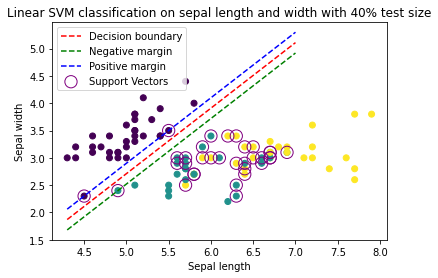

In [9]:
# Load all 150 entries in the iris dataset
data, targets = datasets.load_iris(return_X_y=True)
data = data[:, :2] 
x_train, x_test, t_train, t_test = model_selection.train_test_split(data, targets, test_size=0.4, random_state=0)

# SVM function call
svm_clf = svm.SVC(kernel='linear', C=1000).fit(x_train, t_train) 

# Find the weights and bias
bias = svm_clf.intercept_[0]
weights = svm_clf.coef_[0] 
w1, w2 = weights[0], weights[1]

# Find the slope of the decision boundary and y-intercept
m = -w1/w2
y_int = -bias/w2

# Get x min and x max and y min and y max
x_min, x_max = (iris_data[:,0].min(), iris_data[:,0].max())
y_min, y_max = (iris_data[:,1].min(), iris_data[:,1].max())

# Get equation of the line from the x values
x_values = np.array([x_min, x_max])
y_values = m*x_values + y_int

# Plot the data
plt.scatter(x_train[:, 0], x_train[:, 1], c=t_train)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.plot(x_values, y_values, 'k', color='red', linestyle='dashed', label="Decision boundary")

# Find the top and bottom margins
decision = np.sqrt(np.sum(weights ** 2))
decision_lower = y_values - 1/w2
decision_upper = y_values + 1/w2

# Plot
plt.plot(x_values, decision_lower, 'k', color='green', linestyle='dashed', label="Negative margin")
plt.plot(x_values, decision_upper, 'k', color='blue', linestyle='dashed', label="Positive margin")
plt.title("Linear SVM classification on sepal length and width with 40% test size")

# Circle the support vectors
plt.scatter(svm_clf.support_vectors_[:,0], svm_clf.support_vectors_[:,1], s=150, facecolors='none', edgecolors='purple', label='Support Vectors')

plt.legend()

# Print the weight vector and bias
print("The weight vector is: " + str(weights))
print("The bias is: " + str(bias))

# Training accuracy
training_accuracy = svm_clf.score(x_train, t_train)
print("The training accuracy score is: " + str(training_accuracy))

# Testing accuracy
testing_accuracy = svm_clf.score(x_test, t_test)
print("The testing accuracy score is: " + str(testing_accuracy))

Per the figure above, this is linearly non-seperable. As we see, we have many support vectors that are highlighted which don't even lie on the margins. Therefore, this figure can be rendered useless and we can proceed to design a non-linear SVM.

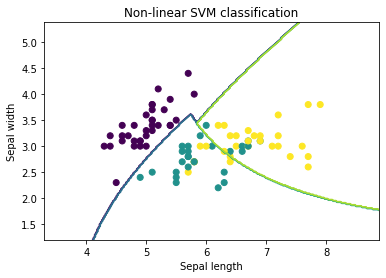

In [10]:
polynomial_svm = svm.SVC(kernel='poly', C=1, random_state=0)
polynomial_svm_clf = polynomial_svm.fit(x_train, t_train)

plt.scatter(x_train[:, 0], x_train[:, 1], c=t_train)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

xval, yval = x_train[:, 0], x_train[:, 1]
x_min, x_max = xval.min() - 1, xval.max() + 1
y_min, y_max = yval.min() - 1, yval.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

z = polynomial_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

plt.contour(xx, yy, z)
plt.title("Non-linear SVM classification")
plt.show()